In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [286]:
house_df = pd.read_csv("crazy_houses.csv")


df = house_df.loc[:, house_df.isnull().mean() < .8]
df

,Unnamed: 0,Price,Living area,Number of rooms,Garden surface,Terrace,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
0,0,349000,180,3,150,1,25,0,256,2,0,4,3,241
1,1,625000,185,3,400,0,0,0,539,3,0,4,3,292
2,2,149000,105,2,25,1,36,0,105,2,0,3,2,469
3,3,335000,209,4,1409,1,28,0,2185,4,0,3,1,196
4,4,545000,254,4,0,1,45,0,260,2,0,2,1,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,9339,382230,163,3,406,0,0,0,406,2,0,2,1,418
9340,9340,382484,163,3,405,0,0,0,405,2,0,2,1,418
9341,9341,384070,163,3,405,0,0,0,405,2,0,2,1,417
9342,9342,406000,185,3,0,1,-6,0,300,3,0,2,0,413


In [287]:
house_df

,Unnamed: 0,Price,Living area,Number of rooms,Garden surface,Terrace,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
0,0,349000,180,3,150,1,25,0,256,2,0,4,3,241
1,1,625000,185,3,400,0,0,0,539,3,0,4,3,292
2,2,149000,105,2,25,1,36,0,105,2,0,3,2,469
3,3,335000,209,4,1409,1,28,0,2185,4,0,3,1,196
4,4,545000,254,4,0,1,45,0,260,2,0,2,1,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,9339,382230,163,3,406,0,0,0,406,2,0,2,1,418
9340,9340,382484,163,3,405,0,0,0,405,2,0,2,1,418
9341,9341,384070,163,3,405,0,0,0,405,2,0,2,1,417
9342,9342,406000,185,3,0,1,-6,0,300,3,0,2,0,413


/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/105875389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


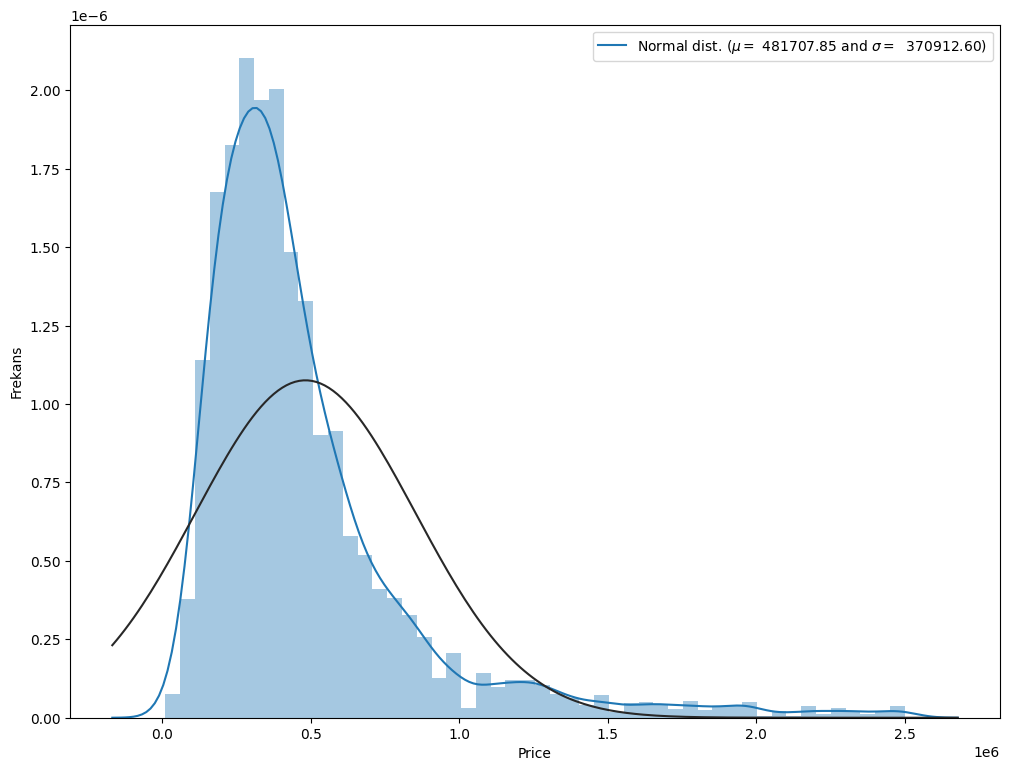

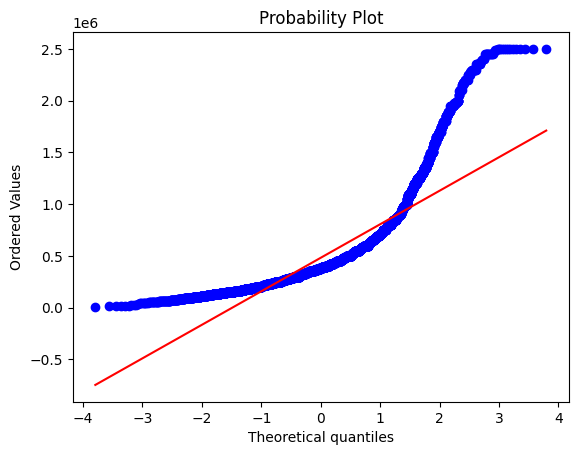

In [288]:
plt.subplots(figsize=(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi oluşturduğumuz dağılımı çizdirelim.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {: .2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frekans')

#Olasılık durumunuda çizdirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/4007975713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


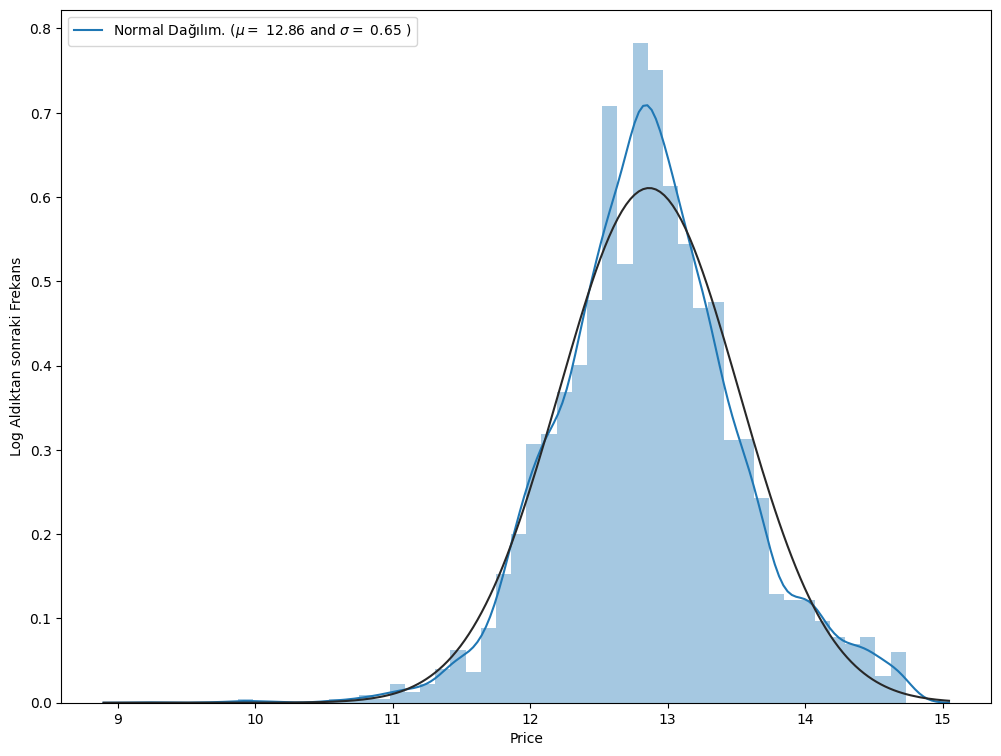

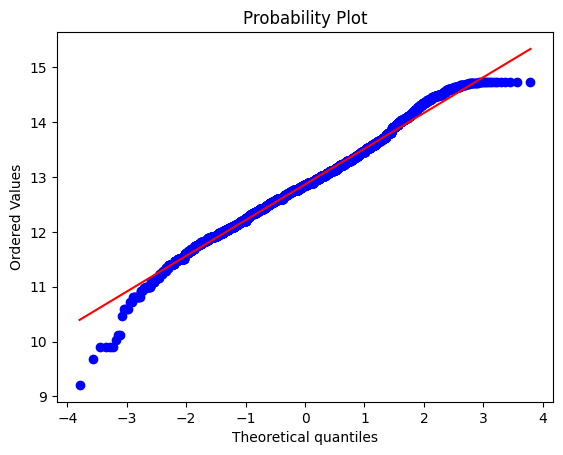

In [289]:
house_df['Price'] = np.log1p(house_df['Price'])

#Şimdi normal dağılımı tekrar kontrol edelim

plt.subplots(figsize =(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

#
(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi dağılımı görselleştirelim
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunu görselleştirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

In [290]:
y = house_df[['Price']]
X = house_df[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       'Garden surface','Open fire',
       'Swimming pool'
       ]]

In [291]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 

In [292]:
lm = LinearRegression() 

reg = lm.fit(X_train,y_train)

reg.score(X, y)

0.40884181666295594

In [293]:
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])

In [294]:
coeff_df

,Coefficient
Building Cond. values,0.144739
Number of facades,0.115314
Number of rooms,0.179664
Living area,-0.000003
Kitchen values,0.116770
Surface of the land,0.000011
Terrace surface,-0.000645
Garden surface,0.000006
Open fire,0.151290
Swimming pool,0.368026


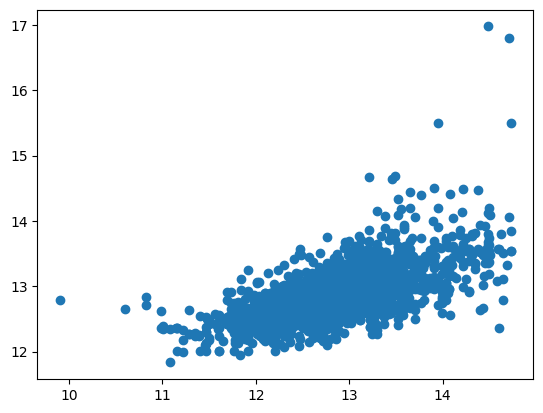

In [295]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

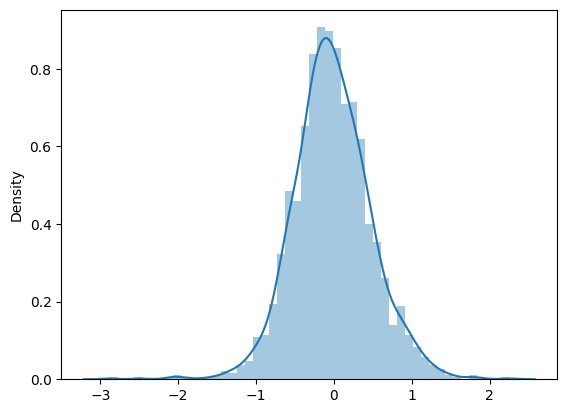

In [303]:
sns.distplot((y_test-predictions),bins=50)

In [297]:
reg = lm.fit(X_train,y_train)

In [298]:
# print("House DataFrame shape (before): ",house_df.shape)
# print("House data min (with outliers): ",house_df['Price'].min())
# print("House data max (with outliers): ",house_df['Price'].max())

# from typing import List
# # Remove outliers
# def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = df[col].mean()
#         sd = df[col].std()
        
#         df = df[(df[col] <= mean+(n_std*sd))]
        
#     return df

# new_housedf = remove_outliers(house_df, ['Price'], 1)

# print("_"*30)
# print("House DataFrame shape (after removing): ",new_housedf.shape)
# print("House data min (without outliers): ", new_housedf['Price'].min())
# print("House data max (without outliers): ", new_housedf['Price'].max())

In [299]:
# y = new_housedf[['Price']]
# X = new_housedf[[
#        'Building Cond. values',
#        'Number of facades',
#        'Number of rooms',
#        'Living area',
#        'Kitchen values',
#        'Surface of the land',
#        'Terrace surface',
#        'Garden surface','Open fire',
#        'Swimming pool'
#        ]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# lm = LinearRegression() 
# reg = lm.fit(X_train,y_train)
# reg.score(X, y)

In [300]:
# predictions = lm.predict(X_test)
# plt.scatter(y_test,predictions)